In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\VIT\Semester-7 (Fall)\CSE1901 - Capstone Project\Code\08-03-2023 Final load forecasting\3_total_with_clusters.csv")
df = df.drop('Unnamed: 0', axis=1)
df_groups = df.groupby('house_cluster')

Cluster 0

In [3]:
cluster0 = df_groups.get_group(0)
energy0 = cluster0.drop('house_cluster', axis=1)

In [4]:
housecount0 = cluster0.groupby('day')[['LCLid']].nunique()
# housecount0.get_group('2012-11-07')
housecount0.head()

,LCLid
day,
2012-03-06,1
2012-03-07,1
2012-03-08,1
2012-03-09,1
2012-03-10,1


<Axes: xlabel='day'>

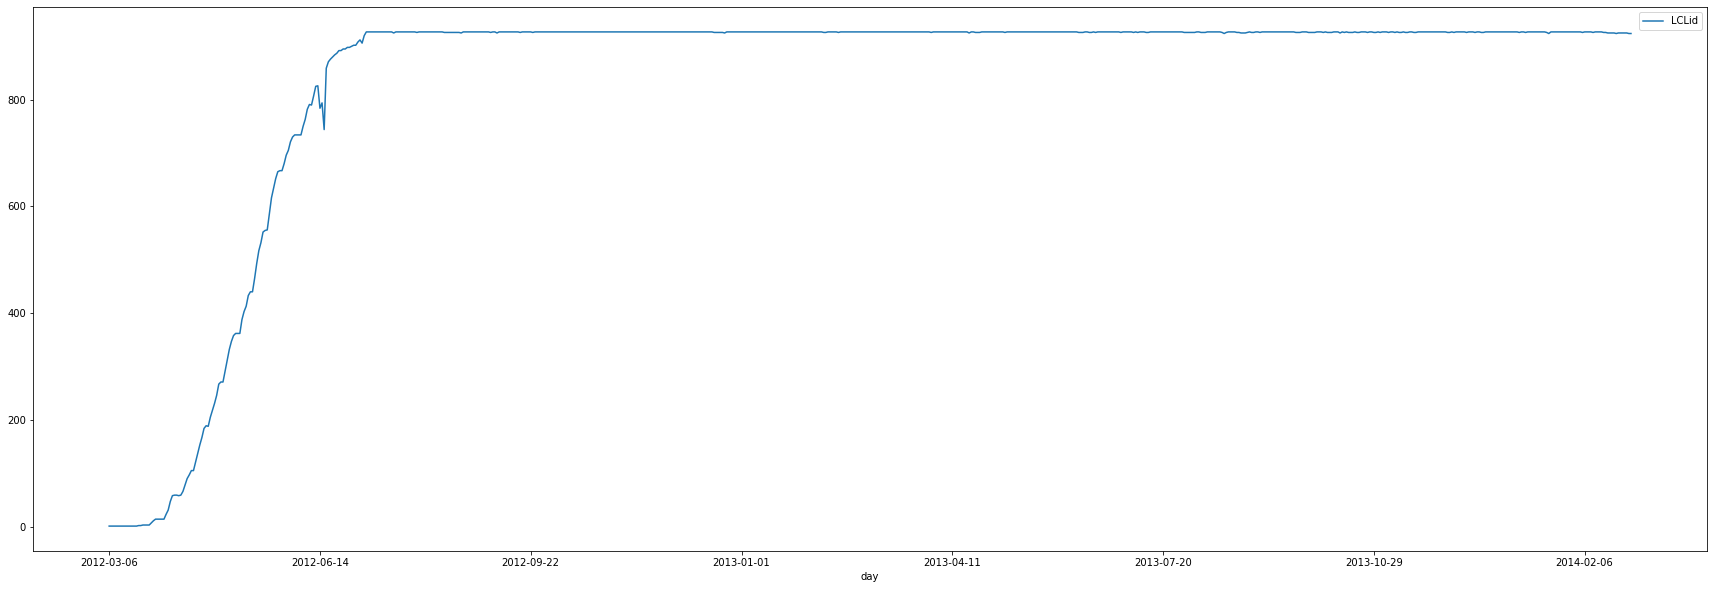

In [5]:
housecount0.plot(figsize=(30,10))

In [6]:
# [['LCLid', 'energy_sum', 'temperatureMax', 'windSpeed', 'humidity', 'holiday_ind']]
energy0 = cluster0.groupby('day')[['energy_sum', 'temperatureMax', 'windSpeed', 'humidity', 'holiday_ind']].sum()
energy0 = energy0.merge(housecount0, on=['day'])
energy0 = energy0.reset_index()
energy0.count()

day               723
energy_sum        723
temperatureMax    723
windSpeed         723
humidity          723
holiday_ind       723
LCLid             723
dtype: int64

In [7]:
energy0['day'] = pd.to_datetime(energy0['day'],format='%Y-%m-%d').dt.date

In [8]:
energy0['avg_energy'] =  energy0['energy_sum']/energy0['LCLid']
print("Starting Point of Data at Day Level",min(energy0['day']))
print("Ending Point of Data at Day Level",max(energy0['day']))

Starting Point of Data at Day Level 2012-03-06
Ending Point of Data at Day Level 2014-02-28


In [9]:
energy0

,day,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy
0,2012-03-06,1.054000,7.22,1.93,0.78,0,1,1.054000
1,2012-03-07,2.470000,10.75,4.26,0.78,0,1,2.470000
2,2012-03-08,6.165000,12.03,3.54,0.68,0,1,6.165000
3,2012-03-09,6.056000,10.86,4.01,0.78,0,1,6.056000
4,2012-03-10,6.603000,15.39,3.15,0.81,1,1,6.603000
...,...,...,...,...,...,...,...,...
718,2014-02-24,5708.765000,13162.75,4643.50,684.50,0,925,6.171638
719,2014-02-25,5653.074998,10572.75,5263.25,721.50,0,925,6.111432
720,2014-02-26,5638.622000,10443.25,3533.50,675.25,0,925,6.095808
721,2014-02-27,5694.330998,9526.44,3825.36,683.76,0,924,6.162696


In [10]:
energy0.describe()

,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,5092.068155,12081.696736,3024.461314,654.317441,237.969571,838.699862,6.030216
std,1638.687775,6661.904788,1720.766391,207.518360,402.357270,240.454590,0.922070
min,1.054000,-55.620000,1.020000,0.680000,0.000000,1.000000,0.105859
25%,4881.283500,7416.000000,1811.905000,611.820000,0.000000,926.000000,5.422908
50%,5292.939000,11463.880000,3012.750000,713.790000,0.000000,927.000000,5.919488
75%,6098.952999,17036.155000,4050.990000,787.950000,667.000000,927.000000,6.609972
max,12236.374002,30002.400000,9222.960000,1223.640000,1854.000000,927.000000,14.613333


In [11]:
# Weather clusters
from sklearn.preprocessing import MinMaxScaler

scaler0 = MinMaxScaler()
weather_scaled0 = scaler0.fit_transform(energy0[['temperatureMax','humidity','windSpeed']])

In [12]:
weather_scaled0

array([[2.09062340e-03, 8.17688232e-05, 9.86777186e-05],
       [2.20806294e-03, 8.17688232e-05, 3.51336053e-04],
       [2.25064725e-03, 0.00000000e+00, 2.73261375e-04],
       ...,
       [3.49286813e-01, 5.51587951e-01, 3.83051722e-01],
       [3.18785469e-01, 5.58546477e-01, 4.14700161e-01],
       [2.27793447e-01, 6.49211749e-01, 2.24328070e-01]])

[KMeans(n_clusters=1, n_init='auto'), KMeans(n_clusters=2, n_init='auto'), KMeans(n_clusters=3, n_init='auto'), KMeans(n_clusters=4, n_init='auto'), KMeans(n_clusters=5, n_init='auto'), KMeans(n_clusters=6, n_init='auto'), KMeans(n_clusters=7, n_init='auto'), KMeans(n_init='auto'), KMeans(n_clusters=9, n_init='auto'), KMeans(n_clusters=10, n_init='auto'), KMeans(n_clusters=11, n_init='auto'), KMeans(n_clusters=12, n_init='auto'), KMeans(n_clusters=13, n_init='auto'), KMeans(n_clusters=14, n_init='auto'), KMeans(n_clusters=15, n_init='auto'), KMeans(n_clusters=16, n_init='auto'), KMeans(n_clusters=17, n_init='auto'), KMeans(n_clusters=18, n_init='auto'), KMeans(n_clusters=19, n_init='auto')]
[-81.39304442668555, -50.74086103910048, -30.881454918354255, -21.989250590956033, -19.237093039621758, -15.830265951878765, -14.242814556061862, -13.184112914035618, -11.512506029217718, -10.927739900685063, -9.751126830122276, -9.186311889736942, -8.5938032340304, -7.936851173067967, -7.5994138355

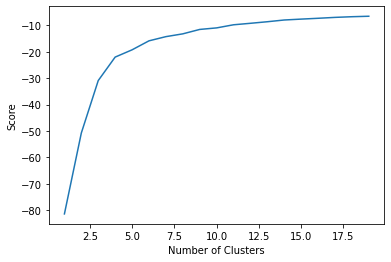

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


Nc0 = range(1,20)
kmeans0 = [KMeans(n_clusters=i, n_init='auto') for i in Nc0]
print(kmeans0)

score0 = [kmeans0[i].fit(weather_scaled0).score(weather_scaled0) for i in range(len(kmeans0))]
print(score0)

plt.plot(Nc0, score0)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [14]:
kmeans0 = KMeans(n_clusters=3, max_iter=600, algorithm='lloyd', n_init='auto')
kmeans0.fit(weather_scaled0)
energy0['weather_cluster'] = kmeans0.labels_
energy0.head()

,day,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy,weather_cluster
0,2012-03-06,1.054,7.22,1.93,0.78,0,1,1.054,2
1,2012-03-07,2.470,10.75,4.26,0.78,0,1,2.470,2
2,2012-03-08,6.165,12.03,3.54,0.68,0,1,6.165,2
3,2012-03-09,6.056,10.86,4.01,0.78,0,1,6.056,2
4,2012-03-10,6.603,15.39,3.15,0.81,1,1,6.603,2


In [15]:
# Model

In [16]:
import numpy as np

np.random.seed(11)
dataframe = energy0.loc[:,'avg_energy']
dataset = dataframe.values
dataset = dataset.astype('float32')

In [17]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [18]:
reframed0 = series_to_supervised(dataset, 7,1)
reframed0.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,1.054,2.470,6.165,6.056,6.603,4.672,3.200,4.427
8,2.470,6.165,6.056,6.603,4.672,3.200,4.427,3.096
9,6.165,6.056,6.603,4.672,3.200,4.427,3.096,3.224
10,6.056,6.603,4.672,3.200,4.427,3.096,3.224,3.998
11,6.603,4.672,3.200,4.427,3.096,3.224,3.998,9.516


In [19]:
reframed0['weather_cluster'] = energy0['weather_cluster'].values[7:]
reframed0['holiday_ind']= energy0['holiday_ind'].values[7:]

In [20]:
reframed0 = reframed0.reindex(['weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'], axis=1)
reframed0 = reframed0.values

In [21]:
n = int(0.2*(len(energy0)))
n

144

In [22]:
# Normalisation
scaler0 = MinMaxScaler(feature_range=(0, 1))
reframed0 = scaler0.fit_transform(reframed0)

In [23]:
train0 = reframed0[:(len(reframed0)-n), :]
test0 = reframed0[(len(reframed0)-n):len(reframed0), :]

In [24]:
train_X0, train_y0 = train0[:, :-1], train0[:, -1]
test_X0, test_y0 = test0[:, :-1], test0[:, -1]

In [25]:
train_X0 = train_X0.reshape((train_X0.shape[0], 1, train_X0.shape[1]))
test_X0 = test_X0.reshape((test_X0.shape[0], 1, test_X0.shape[1]))
print(train_X0.shape, train_y0.shape, test_X0.shape, test_y0.shape)

(572, 1, 9) (572,) (144, 1, 9) (144,)


In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import L2

In [27]:
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='rmsprop')

# # fit network
# history = model.fit(train_X0, train_y0, epochs=50, batch_size=72, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# # plot history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()


In [28]:
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu', kernel_regularizer=L2(0.01)))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')

# # fit network
# history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# # plot history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

Epoch 1/100
18/18 - 4s - loss: 0.1289 - val_loss: 0.1037 - 4s/epoch - 236ms/step
Epoch 2/100
18/18 - 0s - loss: 0.0459 - val_loss: 0.0150 - 79ms/epoch - 4ms/step
Epoch 3/100
18/18 - 0s - loss: 0.0049 - val_loss: 0.0022 - 79ms/epoch - 4ms/step
Epoch 4/100
18/18 - 0s - loss: 0.0056 - val_loss: 0.0035 - 79ms/epoch - 4ms/step
Epoch 5/100
18/18 - 0s - loss: 0.0039 - val_loss: 0.0019 - 78ms/epoch - 4ms/step
Epoch 6/100
18/18 - 0s - loss: 0.0029 - val_loss: 0.0018 - 76ms/epoch - 4ms/step
Epoch 7/100
18/18 - 0s - loss: 0.0030 - val_loss: 0.0017 - 81ms/epoch - 4ms/step
Epoch 8/100
18/18 - 0s - loss: 0.0029 - val_loss: 0.0016 - 80ms/epoch - 4ms/step
Epoch 9/100
18/18 - 0s - loss: 0.0026 - val_loss: 0.0015 - 79ms/epoch - 4ms/step
Epoch 10/100
18/18 - 0s - loss: 0.0025 - val_loss: 0.0015 - 78ms/epoch - 4ms/step
Epoch 11/100
18/18 - 0s - loss: 0.0023 - val_loss: 0.0015 - 82ms/epoch - 5ms/step
Epoch 12/100
18/18 - 0s - loss: 0.0024 - val_loss: 0.0014 - 79ms/epoch - 4ms/step
Epoch 13/100
18/18 - 0s -

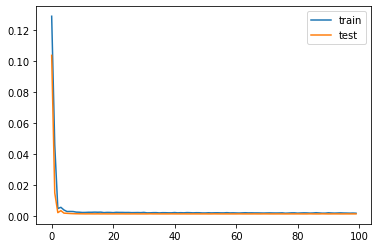

In [29]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

5/5 [==============================] - 1s 2ms/step
(144, 1) (144,)
(144,) (144,)
Test MAE: 0.014


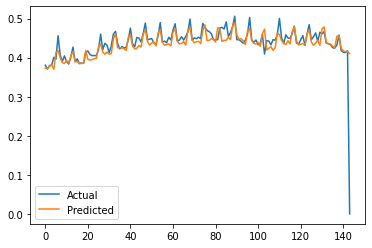

In [30]:
# make predictions on test data
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(test_X0)
print(y_pred.shape, test_y0.shape)
y_pred = y_pred.reshape(-1)
test_y0 = test_y0.reshape(-1)
print(y_pred.shape, test_y0.shape)
# calculate MAE
mae = mean_absolute_error(test_y0, y_pred)
print('Test MAE: %.3f' % mae)

# plot actual vs predicted values
plt.plot(test_y0)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error

# calculate MSE
mse = mean_squared_error(test_y0, y_pred)
print('Test MSE: %.3f' % mse)

rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Test MSE: 0.001
Test RMSE: 0.037


In [32]:
from sklearn.metrics import r2_score
acc = r2_score(test_y0, y_pred)
print(acc)

0.33452692062994127


Cross Validation

In [33]:
df_temp0 = pd.DataFrame(reframed0, columns = ['weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'])
df_temp0['date'] = energy0['day']
df_temp0 = df_temp0[['date', 'weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)']]
df_temp0

,date,weather_cluster,holiday_ind,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
0,2012-03-06,1.0,0.000000,0.000000,0.002300,0.305883,0.296927,0.341869,0.183217,0.062277,0.297856
1,2012-03-07,1.0,0.000000,0.104430,0.305883,0.296927,0.341869,0.183217,0.062277,0.163088,0.206110
2,2012-03-08,1.0,0.000000,0.376936,0.296927,0.341869,0.183217,0.062277,0.163088,0.053733,0.214933
3,2012-03-09,1.0,0.000000,0.368897,0.341869,0.183217,0.062277,0.163088,0.053733,0.064249,0.268285
4,2012-03-10,1.0,0.000539,0.409238,0.183217,0.062277,0.163088,0.053733,0.064249,0.127841,0.648641
...,...,...,...,...,...,...,...,...,...,...,...
711,2014-02-17,0.0,0.000000,0.397648,0.327280,0.324331,0.315167,0.313659,0.323435,0.353628,0.418114
712,2014-02-18,0.0,0.000000,0.396143,0.324331,0.315167,0.313659,0.323435,0.353628,0.306428,0.413964
713,2014-02-19,0.0,0.000000,0.393496,0.315167,0.313659,0.323435,0.353628,0.306428,0.301482,0.412887
714,2014-02-20,0.0,0.000000,0.385270,0.313659,0.323435,0.353628,0.306428,0.301482,0.300198,0.417498


In [34]:
X = df_temp0.iloc[:,:-1]
y = df_temp0.iloc[:,-1]

In [35]:
from sklearn.model_selection import GroupKFold

# Assuming you have time series data X and target variable y, as well as a groups variable defining the groups
# For example, groups could be the year or month of each data point

# Define the number of folds and the groups for each data point
n_splits = 5
scores = []
groups = X['date']

# Define the grouped k-fold cross-validation object
group_kfold = GroupKFold(n_splits=n_splits)

In [36]:
X = X.drop(['date'], axis=1)
X

,weather_cluster,holiday_ind,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
0,1.0,0.000000,0.000000,0.002300,0.305883,0.296927,0.341869,0.183217,0.062277
1,1.0,0.000000,0.104430,0.305883,0.296927,0.341869,0.183217,0.062277,0.163088
2,1.0,0.000000,0.376936,0.296927,0.341869,0.183217,0.062277,0.163088,0.053733
3,1.0,0.000000,0.368897,0.341869,0.183217,0.062277,0.163088,0.053733,0.064249
4,1.0,0.000539,0.409238,0.183217,0.062277,0.163088,0.053733,0.064249,0.127841
...,...,...,...,...,...,...,...,...,...
711,0.0,0.000000,0.397648,0.327280,0.324331,0.315167,0.313659,0.323435,0.353628
712,0.0,0.000000,0.396143,0.324331,0.315167,0.313659,0.323435,0.353628,0.306428
713,0.0,0.000000,0.393496,0.315167,0.313659,0.323435,0.353628,0.306428,0.301482
714,0.0,0.000000,0.385270,0.313659,0.323435,0.353628,0.306428,0.301482,0.300198


In [37]:
# Loop through each fold and split the data into training and testing sets
for train_index, test_index in group_kfold.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Converting to nparray
    X_train = np.asarray(X_train).astype(np.float32)
    X_test = np.asarray(X_test).astype(np.float32)
    y_train = np.asarray(y_train).astype(np.float32)
    y_test = np.asarray(y_test).astype(np.float32)

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    # Train and evaluate the model on the training and testing sets
    model.fit(X_train, y_train)
    score = model.evaluate(X_test, y_test)
    
    # Store the performance score for this fold
    scores.append(score)

# Compute the average performance score over all the folds
avg_score = sum(scores) / n_splits

5/5 [==============================] - 0s 2ms/step - loss: 0.0032


In [38]:
model.metrics_names

['loss']

In [39]:
scores

[0.0018243590602651238,
 0.00044550601160153747,
 0.0020979023538529873,
 0.00041669196798466146,
 0.003225770778954029]

In [40]:
avg_score

0.0016020460345316679

In [41]:
# Interpretation:
# We took 'loss' as the evaluation metric while training our model, so this cross validation score basically means the how well the model is performing on data that it hasn't seen during training. 
# Here, the less validation score indicates better performance of the model. 
# Higher validation score would mean overfitting on the training data.

Grid Search

In [42]:
def create_model(units=50, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {'units': [50, 64, 128],
              'epochs': [50, 100],
              'batch_size': [32, 64],
              'verbose': [0, 1, 2]}

In [45]:
def custom_scorer(estimator, X, y):
    return estimator.score(X, y)

In [46]:
from scikeras.wrappers import KerasRegressor
model_wrapper = KerasRegressor(build_fn=create_model, units=16)

In [47]:
print(model_wrapper.get_params().keys())

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'units'])


In [48]:
grid = GridSearchCV(estimator=model_wrapper, param_grid=param_grid, n_jobs=-1, cv=5, scoring=custom_scorer)
grid_search = grid.fit(train_X0, train_y0) 

C:\Users\HARTE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/100
18/18 - 4s - loss: 0.1296 - 4s/epoch - 213ms/step
Epoch 2/100
18/18 - 0s - loss: 0.0417 - 126ms/epoch - 7ms/step
Epoch 3/100
18/18 - 0s - loss: 0.0054 - 128ms/epoch - 7ms/step
Epoch 4/100
18/18 - 0s - loss: 0.0035 - 156ms/epoch - 9ms/step
Epoch 5/100
18/18 - 0s - loss: 0.0028 - 54ms/epoch - 3ms/step
Epoch 6/100
18/18 - 0s - loss: 0.0025 - 46ms/epoch - 3ms/step
Epoch 7/100
18/18 - 0s - loss: 0.0025 - 48ms/epoch - 3ms/step
Epoch 8/100
18/18 - 0s - loss: 0.0025 - 47ms/epoch - 3ms/step
Epoch 9/100
18/18 - 0s - loss: 0.0024 - 47ms/epoch - 3ms/step
Epoch 10/100
18/18 - 0s - loss: 0.0024 - 52ms/epoch - 3ms/step
Epoch 11/100
18/18 - 0s - loss: 0.0024 - 58ms/epoch - 3ms/step
Epoch 12/100
18/18 - 0s - loss: 0.0025 - 43ms/epoch - 2ms/step
Epoch 13/100
18/18 - 0s - loss: 0.0024 - 52ms/epoch - 3ms/step
Epoch 14/100
18/18 - 0s - loss: 0.0023 - 53ms/epoch - 3ms/step
Epoch 15/100
18/18 - 0s - loss: 0.0022 - 51ms/epoch - 3ms/step
Epoch 16/100
18/18 - 0s - loss: 0.0024 - 53ms/epoch - 3ms/ste

In [49]:
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Print the full cv_results_ dictionary
print("CV results:", grid_search.cv_results_)

Best parameters: {'batch_size': 32, 'epochs': 100, 'units': 50, 'verbose': 2}
Best score: 0.4544883461427286
CV results: {'mean_fit_time': array([15.04710755, 15.89832921, 16.67581191, 15.47738748, 16.96140161,
       17.58536348, 19.48733215, 24.21864395, 23.78974462, 26.32475462,
       23.22889509, 22.19726667, 27.12806454, 27.23965063, 26.66738081,
       36.27414494, 53.20773163, 50.57514787, 43.86717081, 34.38857346,
       31.47740078, 30.08366313, 20.49785495, 22.86685596, 26.53047118,
       30.40495763, 28.30722022, 33.74487877, 36.0359313 , 33.21751933,
       34.10890794, 27.51321716, 20.75129399, 24.90918179, 25.94231229,
       22.56338401]), 'std_fit_time': array([ 1.32537654,  1.11789043,  0.47072649,  0.96416961,  1.57655021,
        1.36298431,  1.28131782,  0.85224244,  0.91460047,  4.17460784,
        0.29607145,  0.27068192,  2.83393322,  0.26744154,  0.52827962,
        4.60876905,  1.45994303,  2.55816721, 12.60447526,  1.94752372,
        0.96669158,  5.14072204

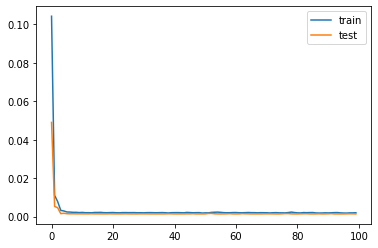

In [50]:
# MODEL update after Grid Search (units = 128,64 and verbose = 0)

# design network
model = Sequential()
model.add(LSTM(128, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=0, shuffle=False, validation_data=(test_X0, test_y0))

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

5/5 [==============================] - 1s 2ms/step
(144, 1) (144,)
(144,) (144,)
Test MAE: 0.014


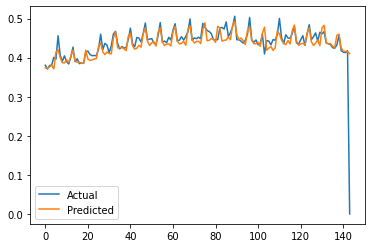

In [51]:
# make predictions on test data
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(test_X0)
print(y_pred.shape, test_y0.shape)
y_pred = y_pred.reshape(-1)
test_y0 = test_y0.reshape(-1)
print(y_pred.shape, test_y0.shape)
# calculate MAE
mae = mean_absolute_error(test_y0, y_pred)
print('Test MAE: %.3f' % mae)

# plot actual vs predicted values
plt.plot(test_y0)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error

# calculate MSE
mse = mean_squared_error(test_y0, y_pred)
print('Test MSE: %.3f' % mse)

rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Test MSE: 0.001
Test RMSE: 0.037
